In [1]:
import ipyparams
import json

<IPython.core.display.Javascript object>

In [2]:
ds = ipyparams.params['collection']
print(ds)
dso = json.loads(ds)
# if this cell fails the first run.
# run a second time, and it works.
datasets,tools, queries =dso.get('datasets'),dso.get('tools'), dso.get('queries')
#print(f'datasets={datasets}')
#print(f'===')
for d in datasets:
    print (f'g={d.get("g")} \nname= "{d.get("name")}"  \n ====' )
ds0 = datasets[0]
#print(f'=== {ds0}')
urn = datasets[0].get('g')
ds0url = datasets[0].get('disurl')
if len(ds0url) > 0:
    url = ds0url[0]
else :
    url = ''

print(f'url={url}  urn={urn}')

{"description":{"name":"m1","brief":"Earthcube Collection"},"queries":[],"tools":[],"datasets":[{"4":4,"subj":"https://www.bco-dmo.org/dataset/753431","g":"urn:gleaner2:milled:bco-dmo:2b722157bab81071d72e260ac909ac553da2daf3","resourceType":"data","name":"Flow cytometry measurements from HHQ experiments conducted during the MesoHux mesocosm experiment, May 2017, Bergen, Norway","pubname":"Biological and Chemical Data Management Office","datep":"2019-01-23","disurl":[""]},{"5":5,"subj":"https://www.bco-dmo.org/dataset/752722","g":"urn:gleaner2:milled:bco-dmo:4af47b342e95f9a0a4f1d9915a4fe6dda5600a71","resourceType":"data","name":"Bacteria cell counts and virus-like particle abundances from Espelandsvegen Fjord, Bergen Norway, May 2017","pubname":"Biological and Chemical Data Management Office","datep":"2021-01-06","disurl":[""]},{"0":0,"subj":"DOI:10.1594/IEDA/500036","g":"urn:gleaner:milled:iedadata:2b496a3c21ab042e79b66beae72f99691daa77ff","resourceType":"data","name":"Processed multic

In [6]:
URNs = list(map(lambda d: d.get('g'), datasets))
URNs

['urn:gleaner2:milled:bco-dmo:2b722157bab81071d72e260ac909ac553da2daf3',
 'urn:gleaner2:milled:bco-dmo:4af47b342e95f9a0a4f1d9915a4fe6dda5600a71',
 'urn:gleaner:milled:iedadata:2b496a3c21ab042e79b66beae72f99691daa77ff',
 'urn:gleaner:milled:iedadata:d10e3b674cefcdea8f6697c3dc9f33fadc5efb7f']

In [7]:
import httpimport
with httpimport.github_repo('earthcube', 'earthcube_utilities'):
    import earthcube_utilities as ec
ec.local()
#ec.wget_rdf(urn)
dfRDFs=list(map(ec.wget_rdf, URNs))
#!ls -l, to see it
dfRDFs[0] #you can look at others (beyond 0)if there

In [8]:
#Get resource download URL from the metadata
ds_urls,ds_url= ec.getDatasetURLs(URNs) #if d1 else ec.getDatasetURLs(dRows,dfSPARQL) 
ds_urls #list of dataset's urls ;can use 1st or filter by ext ..

grep2obj:2b722157bab81071d72e260ac909ac553da2daf3.nt
grep2obj:4af47b342e95f9a0a4f1d9915a4fe6dda5600a71.nt
grep2obj:2b496a3c21ab042e79b66beae72f99691daa77ff.nt
grep2obj:d10e3b674cefcdea8f6697c3dc9f33fadc5efb7f.nt


[['https://darchive.mblwhoilibrary.org/bitstream/1912/23804/2/dataset-753431_hhq-flow-cytometry__v1_README.txt',
  'https://darchive.mblwhoilibrary.org/bitstream/1912/23804/4/NOAA_ISO19115-2.xml',
  'https://darchive.mblwhoilibrary.org/bitstream/1912/23804/3/Dataset_description.pdf',
  'https://darchive.mblwhoilibrary.org/bitstream/1912/23804/1/dataset-753431_hhq-flow-cytometry__v1.tsv',
  ''],
 ['https://darchive.mblwhoilibrary.org/bitstream/1912/26533/2/dataset-752722_bergen-mesohux-2017-bacteria-and-virus-abundance__v1_README.txt',
  'https://darchive.mblwhoilibrary.org/bitstream/1912/26533/3/Dataset_description.pdf',
  'https://darchive.mblwhoilibrary.org/bitstream/1912/26533/1/dataset-752722_bergen-mesohux-2017-bacteria-and-virus-abundance__v1.tsv',
  'https://darchive.mblwhoilibrary.org/bitstream/1912/26533/4/NOAA_ISO19115-2.xml',
  ''],
 ['http://dx.doi.org/10.1594/IEDA/500036',
  'http://www.marine-geo.org/tools/search/Files.php?data_set_uid=29412',
  ''],
 ['http://dx.doi.org/

In [9]:
#Filter URLs to download, if you want:
ext='.tsv' #you can pick
ds_url=ec.collect_ext(ds_urls,ext)
#Download the resource
#df=ec.read_file(url,ext) #can cut+paste one you want to see, or get them all:
DFs=list(map(lambda u: ec.read_file(u,ext), ds_url)) #you can look at separately below
ds_url

['https://darchive.mblwhoilibrary.org/bitstream/1912/23804/1/dataset-753431_hhq-flow-cytometry__v1.tsv',
 'https://darchive.mblwhoilibrary.org/bitstream/1912/26533/1/dataset-752722_bergen-mesohux-2017-bacteria-and-virus-abundance__v1.tsv']

In [10]:
!ls -l

total 264
-rw-r--r-- 1 jovyan jovyan 11784 Jul 26 19:43 2b496a3c21ab042e79b66beae72f99691daa77ff.nt
-rw-r--r-- 1 jovyan jovyan 11784 Jun 12 22:47 2b496a3c21ab042e79b66beae72f99691daa77ff.rdf
-rw-r--r-- 1 jovyan jovyan 28637 Jul 26 19:43 2b722157bab81071d72e260ac909ac553da2daf3.nt
-rw-r--r-- 1 jovyan jovyan 28637 Jun  4 12:49 2b722157bab81071d72e260ac909ac553da2daf3.rdf
-rw-r--r-- 1 jovyan jovyan 21245 Jul 26 19:43 4af47b342e95f9a0a4f1d9915a4fe6dda5600a71.nt
-rw-r--r-- 1 jovyan jovyan 21245 Jun  4 12:49 4af47b342e95f9a0a4f1d9915a4fe6dda5600a71.rdf
-rw-r--r-- 1 jovyan jovyan    23 Jul 11 21:51 apt.txt
-rw-r--r-- 1 jovyan jovyan 30732 Jul 26 19:43 collection.ipynb
drwxr-xr-x 2 jovyan jovyan  4096 Jul 11 21:51 config
-rw-r--r-- 1 jovyan jovyan  3808 Jul 11 21:51 count_objects.ipynb
-rw-r--r-- 1 jovyan jovyan 11368 Jul 26 19:43 d10e3b674cefcdea8f6697c3dc9f33fadc5efb7f.nt
-rw-r--r-- 1 jovyan jovyan 11368 Jun 12 22:48 d10e3b674cefcdea8f6697c3dc9f33fadc5efb7f.rdf
-rw-r--r-- 1 jovyan jovyan 250

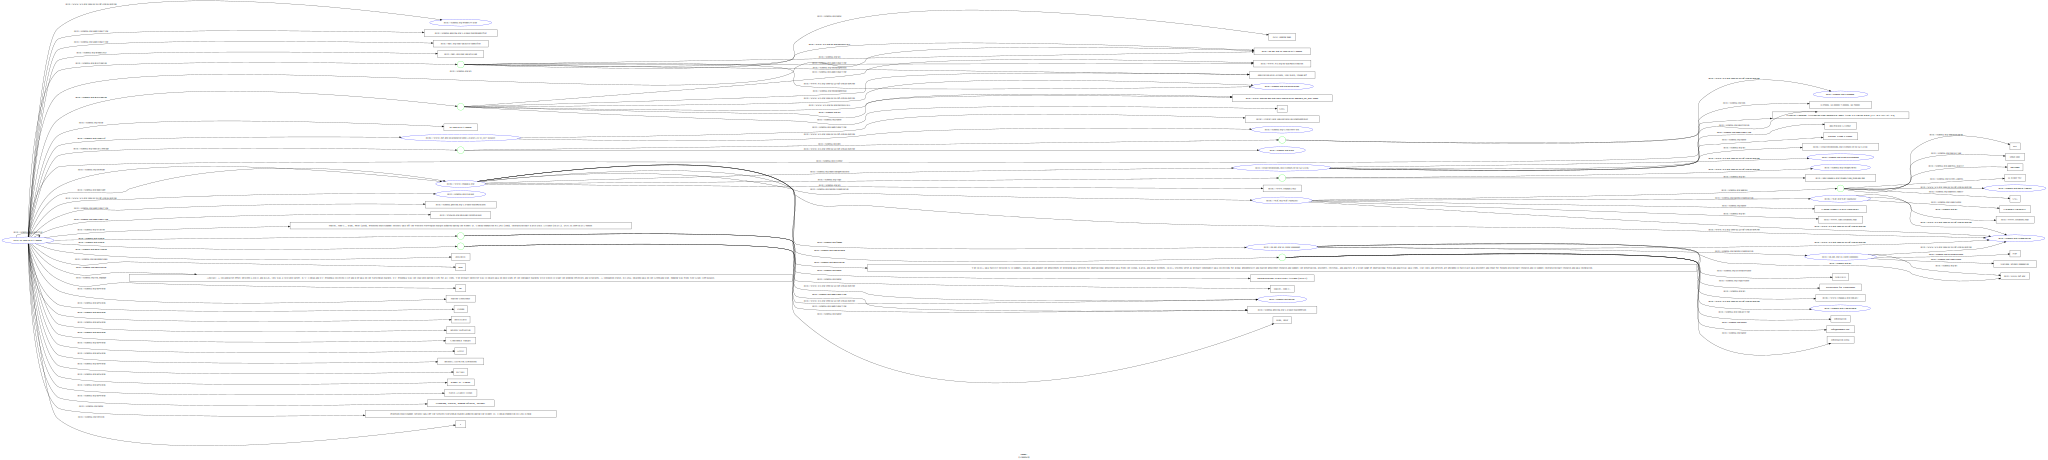

In [11]:
ec.viz()